# Engle-Granger single equation cointegration test

El concepto de cointegración fue propuesto por Engle y Granger (1987). La idea de la cointegración es la de encontrar una combinación lineal entre dos variables $I(d)$ que generan una variable con un orden de integración menor. Formalmente, la cointegración se define como:

* **Def (Cointegración)**. Los componentes del vector $x_t$ son cointegrados de orden $d$ y $b$, denotado como $x_t \thicksim CI(d,b)$, si 
    * (a) todos los componentes de $x_t$ son $I(d)$ y 
    * (b) existe un vector $\alpha$ tal que $z_t = \alpha'x_t \thicksim I(d - b), b >0$}. El vector $\alpha$ es llamado el vector de cointegración.
    
Con la cointegración es posible detectar relaciones estables de largo plazo entre variables no estacionarias. 

Para el caso que $d=1$, $b=1$, $\textit{i.e.}$, los componentes en el vector $x_t$ son todo integrados de orden uno, pero si existe una combinación lineal $\alpha$, entonces la serie resultante $z_t$ es estacionaria. Aunque las series individuales no son estacionarias, estas están atadas entre sí por el vector de cointegración.

Ahora la pregunta es cómo estimar el vector de cointegración $\alpha$ y cómo modelar el comportamiento dinámico de las variables $I(d)$.

Engle y Granger (1987) propusieron una técnica de estimación en $\textit{dos pasos}$. En el primer paso, se corre una regresión con las variables $I(1)$:

\begin{equation}
y_t = \alpha_1 x_{t,1} + \alpha_2 x_{t,2} + \dots +\alpha_K x_{t,K} + z_{t} \; \text{ for } \; t= 1, \dots,T,
\end{equation}

donde $z_t$ es el término de error. El vector de cointegración $\hat{\alpha}$ está dado por $\hat{\alpha} = (1,-\hat{\alpha}*)'$, donde $\hat{\alpha}* = (\hat{\alpha}_1,\dots,\hat{\alpha}_K)'$.

Posteriormente, probamos si la serie $\hat{z_t}$ es estacionaria, es decir, las variables son cointegradas, al utilizar pruebas de raíz unitaria (*e.g.*, Dickey-Fuller(DF) o Augmented Dickey-Fuller (ADF)). Una vez que se rechaza la hipótesis nula de raíz unitaria en la serie $\hat{z_t}$, el segundo paso del procedimiento consiste en estimar el *modelo de corrección de error* (ECM). Esto es resultado del *teorema de representación* de Engle y Granger. 

Consideremos el caso de dos variables cointegradas, $y_t$ y $x_t$, ambas $I(1)$. La especificación general de un ECM es como sigue:

\begin{align}
y_t = \psi_0 + \gamma_1 \hat{z}_{t-1} + \sum_{i=1}^K \psi_{1,i}\Delta x_{t-i} + \sum_{i=1}^L \psi_{2,i}\Delta y_{t-i} + \varepsilon_{1,t} \; ,\\
x_t = \xi_0 + \gamma_2 \hat{z}_{t-1} + \sum_{i=1}^K \xi_{1,i}\Delta y_{t-i} + \sum_{i=1}^L \xi_{2,i}\Delta x_{t-i} + \varepsilon_{2,t} \; ,
\end{align}

donde $\hat{z_t}$ son los errores de la regresión estática en la primera regresión, y $\varepsilon_{1,t}$, $\varepsilon_{2,t}$ son procesos ruido blanco. Los valores de los coeficientes $\gamma_1$ y $\gamma_2$ determinan la velocidad del ajuste a la trayectoria de largo plazo, y deben ser siempre negativos. En caso que fueran positivos, el sistema diverge de su trayectoria de equilibrio de largo plazo. 

Por otro lado, para dos variables $I(1)$ cointegradas, exite *causalidad en sentido de Granger* en al menos una dirección. Esto es, al menos una variable puede ayudar a pronosticar a la otra.  

### Simulación de Engle-Granger single equation cointegration test

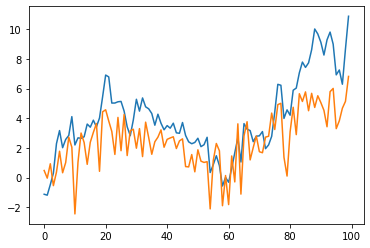

In [24]:
### Simulación de Engle-Granger single equation cointegration test
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

random.seed(123456)

mu, sigma = 0, 0.5
#e1 = np.random.normal(mu, sigma, 1000)
#e2 = np.random.normal(mu, sigma, 1000)
e1 = loadtxt("e1.txt", comments="#", delimiter=",", unpack=False)
e2 = loadtxt("e2.txt", comments="#", delimiter=",", unpack=False)

y1 = np.cumsum(e1)
y2 = 0.6 * y1 + e2

plt.plot([x for x in range(100)],y1)
plt.plot([x for x in range(100)],y2)


In [96]:
### Primer paso del método del EG
from sklearn.linear_model import LinearRegression

# Ajustamos el modelo
X =np.array( [[1,y] for y in y1])
reg = LinearRegression().fit(X, y2)

# Calculamos los errores
error = np.array([y-y_hat for y,y_hat in zip(y2,reg.predict(X))])
error_lagged = error[0:len(error)-2]

# Primera diferencia de y1 y y2
dy1 = np.diff(y1)
dy2 = np.diff(y2)

# Obtenemos el t-1 de las diferencias
dy1_t_1 = dy1[0:len(dy1)-1]
dy2_t_1 = dy2[0:len(dy2)-1]

# Estimamos el ECM
X = np.array([[1,e,dy1,dy2] for e,dy1,dy2 in zip(error_lagged,dy1_t_1,dy2_t_1)])
ecm = LinearRegression().fit(X, dy2[1:len(dy2)])
ecm.coef_

array([ 0.        , -1.06067188,  0.84182773, -1.11249629])

### Engle-Granger: Long-run relationship of consumption, income, and wealth in the United Kingdom

In [115]:
import pandas as pd

hd_ds = pd.read_csv('holden_perman_data_set.csv')

def coint_output(res):
    output = pd.Series([res[0],res[1],res[2][0],res[2][1],res[2][2]],
                        index=['Test Statistic','p-value','Critical Value (1%)',
                               'Critical Value (5%)','Critical Value (10%)'])
    print(output) 
    

import statsmodels.tsa.stattools as stm

coint_output(stm.coint(hd_ds[['lc']].to_numpy(),hd_ds[['lw','li']].to_numpy(), return_results=True))


Test Statistic         -4.088839
p-value                 0.018970
Critical Value (1%)    -4.444446
Critical Value (5%)    -3.829140
Critical Value (10%)   -3.515978
dtype: float64


In [118]:
stm.coint(hd_ds[['lc']].to_numpy(),hd_ds[['lw','li']].to_numpy(), return_results=True)[1]

0.01897001085165337

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


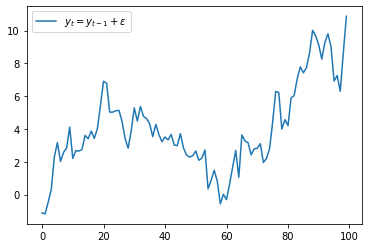

In [12]:
### Simulación de Engle-Granger single equation cointegration test
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt

random.seed(123456)

mu, sigma = 0, 0.5
#e1 = np.random.normal(mu, sigma, 1000)
#e2 = np.random.normal(mu, sigma, 1000)
e1 = loadtxt("e1.txt", comments="#", delimiter=",", unpack=False)
e2 = loadtxt("e2.txt", comments="#", delimiter=",", unpack=False)

y1 = np.cumsum(e1)
y2 = 0.6 * y1 + e2

ax = plt.gca()  # or any other way to get an axis object
ax.plot([x for x in range(100)],y1,label=r'$y_t = y_{t-1} + \varepsilon$')
ax.legend()
plt.savefig("ar_1.eps")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


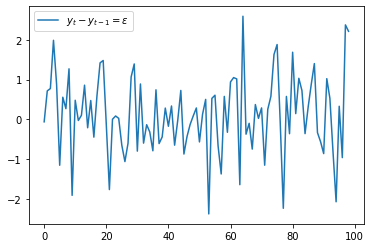

In [13]:
dy1 = np.diff(y1)
ax = plt.gca()  # or any other way to get an axis object
ax.plot([x for x in range(99)],dy1,label=r'$y_t -y_{t-1}= \varepsilon$')
ax.legend()
plt.savefig("diffy.eps")
